In [1]:
from nmm import csolve,OhmicBath,OverdampedBath
from qutip import Qobj,sigmaz,sigmax,sigmay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w0 = 1
alpha = 0.05
gamma = 5
T = 1*w0
tf = 40
t=np.linspace(0,tf,200)
Hsys = sigmaz()/2
Q = sigmax()

In [3]:
bath=OverdampedBath(T,alpha,gamma)
bath2 = OhmicBath(2*T,alpha,gamma)

In [4]:
bath.power_spectrum(1)

0.060845257956512556

In [5]:
bath2.power_spectrum(1)

0.20807993641385875

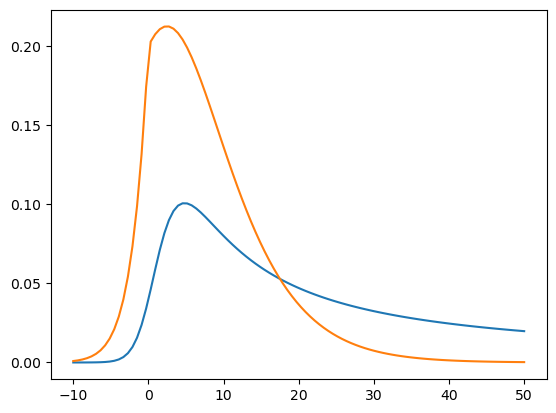

In [6]:
w=np.linspace(-10,50,100)
plt.plot(w,bath.power_spectrum(w))
plt.plot(w,bath2.power_spectrum(w))
plt.show()

In [7]:
#cc = csolve(Hsys,t ,[bath,bath2], [Q,Q])
cc2 = csolve(Hsys, t ,[bath,bath2], [Q,Q],eps=1e-5)

In [8]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [9]:
result=cc2.evolution(rho0)
#result2=cc.evolution(rho0)

2


Calculating the generator ...: 100%|██████████| 4/4 [00:00<00:00, 703.54it/s]


2


Computing Exponential of Generators . . . .: 100%|██████████| 200/200 [00:00<00:00, 4005.08it/s]


In [10]:
cc2.generators[10]

Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', isherm=False
Qobj data =
[[-1.55207672+0.j          0.        +0.j          0.        +0.j
   0.96583686+0.j        ]
 [ 0.        +0.j         -1.25895679+0.j         -0.27940288-0.59463943j
   0.        +0.j        ]
 [ 0.        +0.j         -0.27940288+0.59463943j -1.25895679+0.j
   0.        +0.j        ]
 [ 1.55207672+0.j          0.        +0.j          0.        +0.j
  -0.96583686+0.j        ]]

In [11]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [12]:
# bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
# solver = HEOMSolver(Hsys, bath, max_depth=5)
# result_h = solver.run(rho0, t)

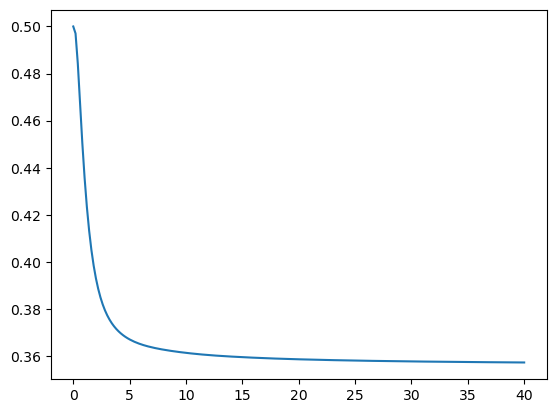

In [13]:
i,j=0,0
plt.plot(t,np.abs(population(result,i,j)))
#plt.plot(t, np.abs(population(result2, i, j)))
# plt.plot(t, np.abs(population(result_h.states, 0, 1)))
# plt.show()

In [14]:
from qutip import brmesolve

In [15]:
def br(rho0,sec=-1):
    DL2 = (
        f"{4*alpha/(gamma)} if (w == 0) else "  # Just taking both limits -> spectral density for pure dephasing
        f"{alpha} *2*pi*w *exp(-abs(w)/{gamma}) * ((1/(exp( w*{1/T})-1))+1)"  # f"2*pi*(2.0 *{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {w/T})-1))+1)"
    )
    DL1 = (
        f"{4*alpha/(gamma)} if (w == 0) else "  # Just taking both limits -> spectral density for pure dephasing
        f"{alpha} *2*pi*w *exp(-abs(w)/{gamma}) * ((1/(exp( w*{1/(2*T)})-1))+1)"  # f"2*pi*(2.0 *{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {w/T})-1))+1)"
    )
    a_ops = [[Q,DL1],[Q,DL2]]
    resultBR = brmesolve(
        Hsys, rho0, t, a_ops=a_ops,sec_cutoff=sec
    )
    return resultBR

In [16]:
resultBR=br(rho0)

/home/mcditoos/qutip_gsoc_app/qutip/core/coefficient.py:386: UserWarning: Both `cython` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
  warnings.warn(


In [17]:
i,j=0,0

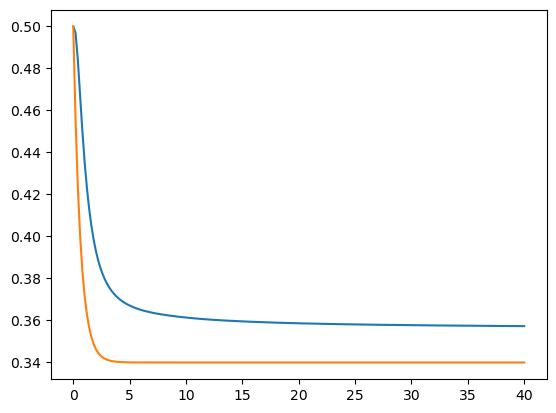

In [18]:
plt.plot(t, np.abs(population(result, i, j)))
plt.plot(t, np.abs(population(resultBR.states, i, j)))
#plt.plot(t, np.abs(population(resultBR2.states, i, j)))

plt.show()


In [19]:
from qutip.solver import heom

In [20]:
obp=heom.SpectralFitter(T,Q,w,bath.spectral_density(w)*np.pi)
obp2=heom.SpectralFitter(2*T,Q,w,bath.spectral_density(w)*np.pi)


In [21]:
bathf,fit_info=obp.get_fit(N=7,Nk=4)
bathf2,fit_info=obp2.get_fit(N=7,Nk=2)

fit_info

{'fit_time': 1.8441517353057861,
 'rmse': 2.24177618445207e-06,
 'N': 7,
 'params': [array([15.70059022,  2.91764853, 10.19774644, 15.70096417, 15.70096271,
         15.70033549, 15.70093916]),
  array([13.95981511,  5.64198382,  9.51925037, 23.67583403, 21.30539413,
         19.24049939, 16.60228448]),
  array([54.96523756,  0.51518015,  0.51515316, 11.93435013, 25.39303623,
         40.44679949,  6.65876796])],
 'Nk': 2,
 'summary': 'Result of fitting The Spectral Density with 7 terms: \n \n Parameters|   lam    |  gamma   |   w0 \n 1         | 1.57e+01 | 1.40e+01 |5.50e+01\n 2         | 2.92e+00 | 5.64e+00 |5.15e-01\n 3         | 1.02e+01 | 9.52e+00 |5.15e-01\n 4         | 1.57e+01 | 2.37e+01 |1.19e+01\n 5         | 1.57e+01 | 2.13e+01 |2.54e+01\n 6         | 1.57e+01 | 1.92e+01 |4.04e+01\n 7         | 1.57e+01 | 1.66e+01 |6.66e+00\n \nA  normalized RMSE of  2.24e-06 was obtained for the The Spectral Density\n The current fit took  1.844152 seconds'}

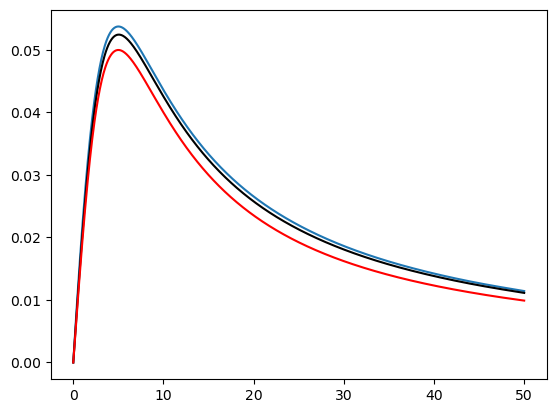

In [22]:
w=np.linspace(0,50,1000)
plt.plot(w,bathf.spectral_density_approx(w)/np.pi)
plt.plot(w,bathf2.spectral_density_approx(w)/np.pi,color='k')
plt.plot(w,bath.spectral_density(w),color='r')

In [23]:
solver = heom.HEOMSolver(Hsys,[bathf2,bathf],max_depth=3)

In [24]:
result_heom=solver.run(rho0,t)

10.1%. Run time:  19.26s. Est. time left: 00:00:02:52
20.1%. Run time:  36.17s. Est. time left: 00:00:02:23
30.2%. Run time:  59.69s. Est. time left: 00:00:02:18
40.2%. Run time:  85.31s. Est. time left: 00:00:02:06
50.3%. Run time: 107.28s. Est. time left: 00:00:01:46
60.3%. Run time: 142.39s. Est. time left: 00:00:01:33
70.4%. Run time: 202.20s. Est. time left: 00:00:01:25
80.4%. Run time: 295.42s. Est. time left: 00:00:01:12
90.5%. Run time: 369.86s. Est. time left: 00:00:00:39
100.0%. Run time: 446.41s. Est. time left: 00:00:00:00
Total run time: 446.43s


In [25]:
from scipy import linalg

In [26]:
def rotation(data, t, diagonal=True):
    rotated = [
        linalg.expm(-(1j * Hsys.full()) * t[i])
        @ data[i].full()
        @ linalg.expm((1j * Hsys.full()) * t[i])
        for i in range(len(t))
    ]
    return rotated

cum=rotation(result,t)

In [27]:
import qutip as qt

In [28]:
n1=bath.bose(w0)
n2=bath2.bose(w0)
spc=bath.spectral_density(w0)
Q1=(sigmax()+1j*sigmay())/2
c_ops=[np.sqrt(2*np.pi*(n1)*spc)*(Q1),np.sqrt(2*np.pi*(n1+1)*spc)*(Q1.dag()),
       np.sqrt(2*np.pi*(n2)*spc)*(Q1),np.sqrt(2*np.pi*(n2+1)*spc)*(Q1.dag())]
result_lindblad = qt.mesolve(Hsys, rho0, t, c_ops)

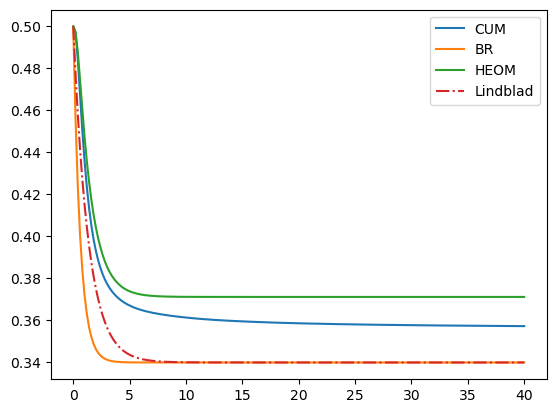

In [29]:
i,j=0,0
plt.plot(t, np.real(population(cum, i, j)),label='CUM')
plt.plot(t, np.real(population(resultBR.states, i, j)),label='BR')
plt.plot(t, np.real(population(result_heom.states, i, j)),label='HEOM')
plt.plot(t, np.real(population(result_lindblad.states, i, j)),'-.',label='Lindblad')
#plt.axhline(y=0.339921666085097,linestyle='-.')
plt.legend()
plt.show()

In [78]:
%timeit cc2.Γgen(bath,1,1,50)

104 ms ± 6.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
cc2.Γgen(bath,1,1,50)

(9.539288030754536+0j)